In [1]:
import pandas as pd
from math import cos, sin, pi
import matplotlib.pyplot as plt
# Разложение делается из предположения, что угол alpha (bearing = пеленг) -- это всегда угол между осью объекта (в направлении, куда он сейчас смотрит)
# и линией, которая начинается на объекте и заканчивается на конечной точек

# считывание данных
df = pd.read_excel("D:\Учебное\Системы навигации автономных роботов\дз3\snar_3.xlsx")

df

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,2016-03-25 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,2016-03-25 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,2016-03-25 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,2016-03-25 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,2016-03-25 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,Fri Mar 25 17:55:28 GMT+03:00 2016,2016-03-25 17:55:21.259,37.525679,55.738373,0.0,4.0,166.0,0.0,0.998703,9.563507,1.149261,0.006151,599.5,0.0,0.006151,-,0.0,0.017152
22277,Fri Mar 25 17:55:28 GMT+03:00 2016,2016-03-25 17:55:21.358,37.525679,55.738373,0.0,4.0,166.0,0.0,1.070480,9.641998,1.154083,0.006844,601.25,0.0,0.006844,-,0.0,0.017644
22278,Fri Mar 25 17:55:28 GMT+03:00 2016,2016-03-25 17:55:21.458,37.525679,55.738373,0.0,4.0,166.0,0.0,1.026428,9.537384,1.169113,0.006450,601.25,0.0,0.006450,-,0.0,0.019176
22279,Fri Mar 25 17:55:28 GMT+03:00 2016,2016-03-25 17:55:21.557,37.525679,55.738373,0.0,4.0,166.0,0.0,0.681564,8.894714,1.603546,-0.057069,609.0,0.0,-0.057069,-,0.0,0.063460


In [2]:
# tst = df['Speed (GPS)(km/h)'].astype(float)
# выдаёт ошибку, так как среди данных присутствует "-"
# поэтому через цикл
speed_gps_km_per_hrs_converted_to_float = []
for i in range(df['Speed (GPS)(km/h)'].shape[0]):
    if df['Speed (GPS)(km/h)'][i] == '-':
        speed_gps_km_per_hrs_converted_to_float.append(0.0)
    else:
        speed_gps_km_per_hrs_converted_to_float.append(float(df['Speed (GPS)(km/h)'][i]))

In [3]:
gps_speed_in_m_per_sec_x = []
gps_speed_in_m_per_sec_y = []

gps_speed_in_km_per_hrs_x = []
gps_speed_in_km_per_hrs_y = []

for i in range(df.shape[0]):
    # перевод из углов в радианы
    bearing_rad = df[' Bearing'][i] * pi / 180
    
    gps_speed_in_m_per_sec_x.append(df['GPS Speed (Meters/second)'][i]*sin(bearing_rad))
    gps_speed_in_m_per_sec_y.append(df['GPS Speed (Meters/second)'][i]*cos(bearing_rad))
    # gps_speed_in_km_per_hrs_x.append(df['Speed (GPS)(km/h)'][i]*cos(bearing_rad)) выдаёт ошибку, так как там кроме чисел есть ещё "-"
    # gps_speed_in_km_per_hrs_y.append(df['Speed (GPS)(km/h)'][i]*sin(bearing_rad)) аналогично случаю выше
    gps_speed_in_km_per_hrs_x.append(speed_gps_km_per_hrs_converted_to_float[i]*sin(bearing_rad))
    gps_speed_in_km_per_hrs_y.append(speed_gps_km_per_hrs_converted_to_float[i]*cos(bearing_rad))

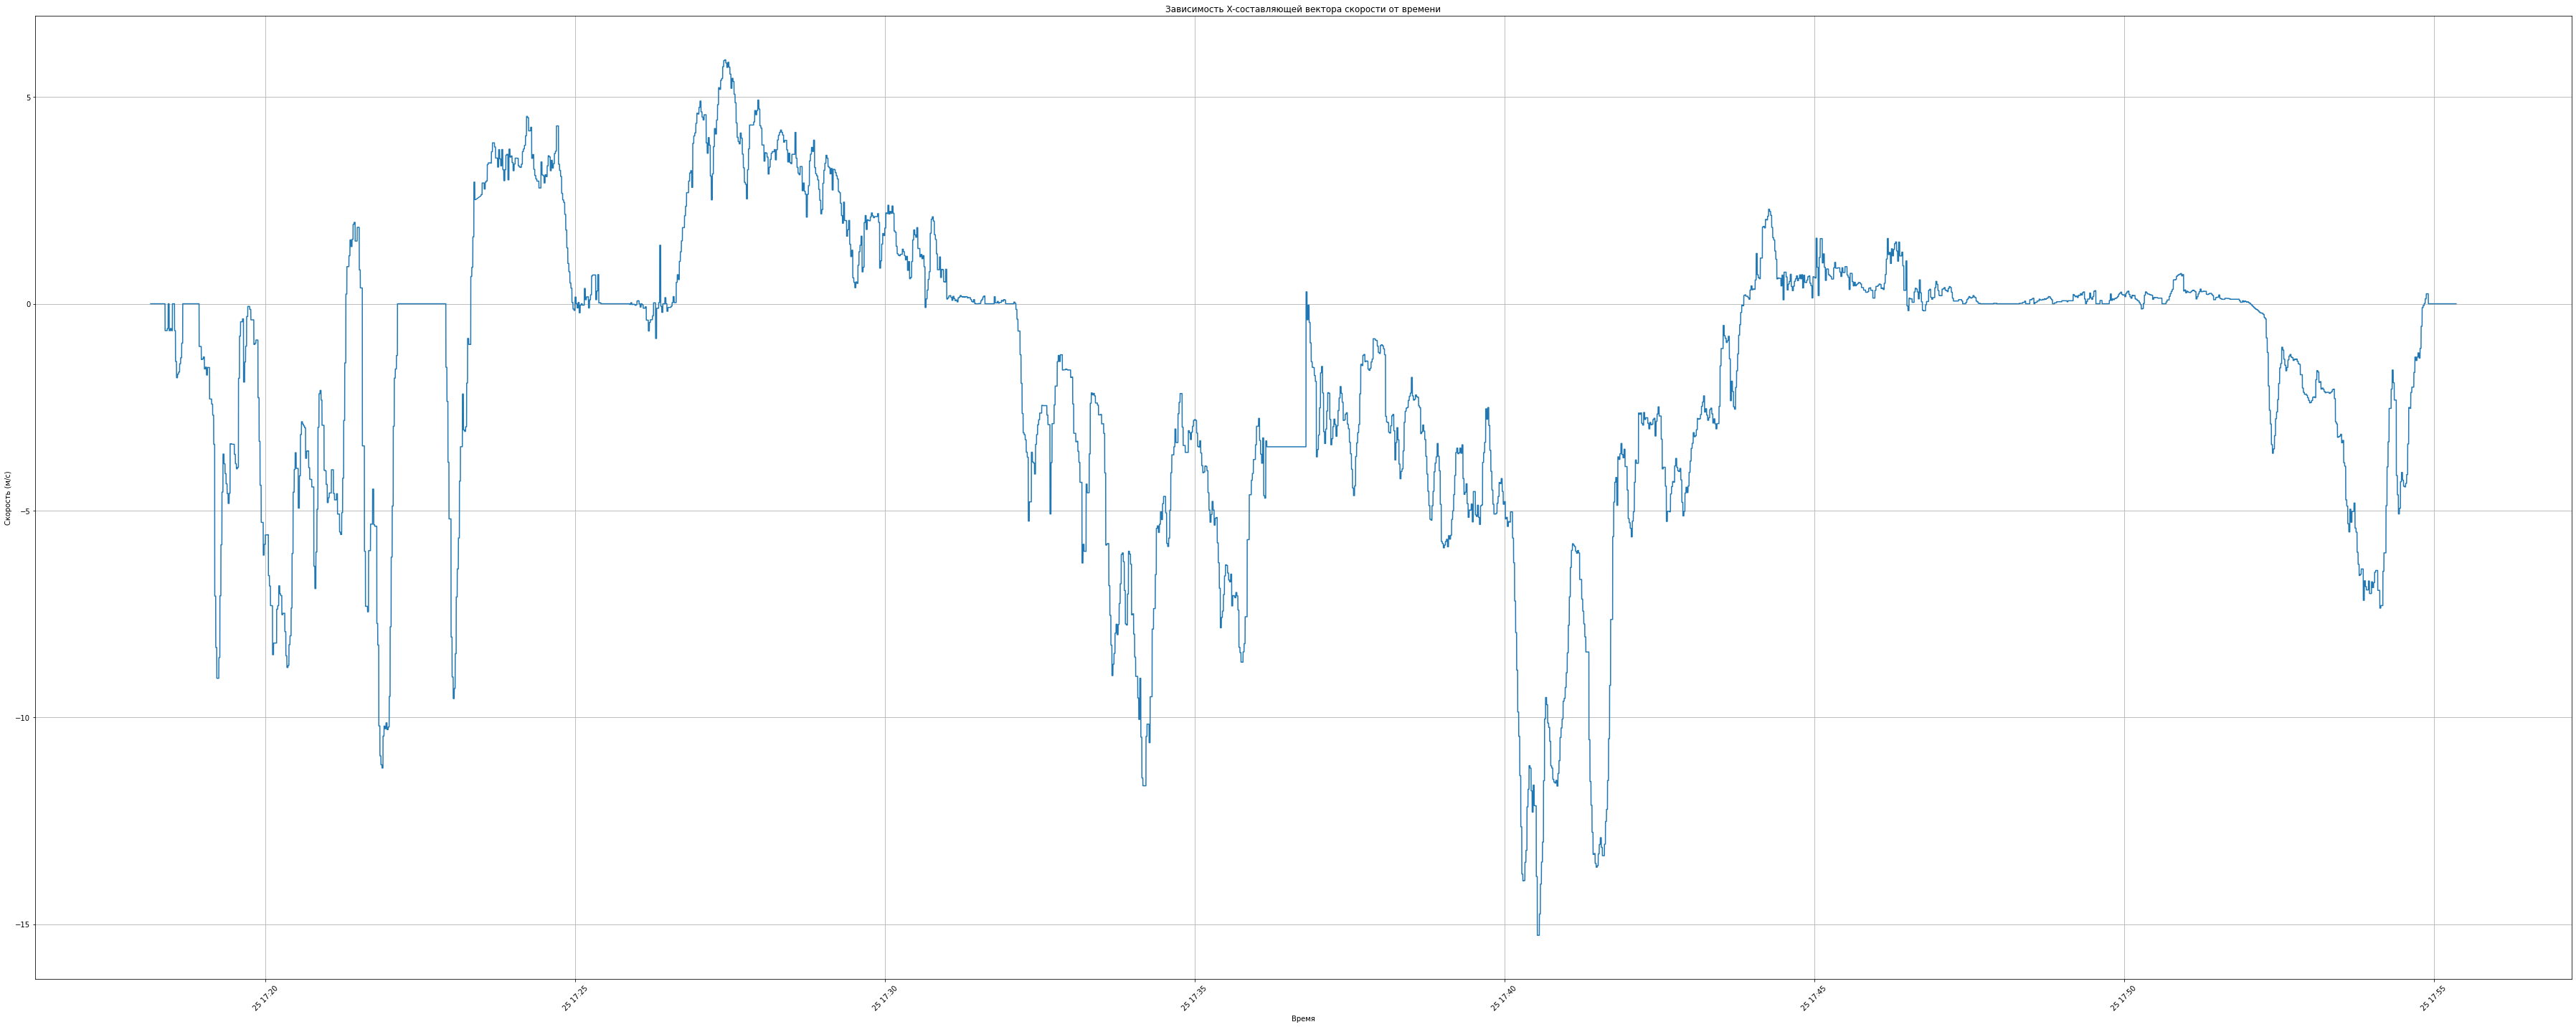

In [4]:
# текущие вопросы: как это интерпретировать; как это в будущем использовать
# я пока не знаю, имеет ли смысл вообще строить графики, но пусть пока будут
# ход построения аналогичен коду Макса

# Преобразуем столбец "Device Time" в формат datetime
df[' Device Time'] = pd.to_datetime(df[' Device Time'], format='%d.%m.%Y %H:%M:%S')

# построение составляющей скорости по x (м/c)
# Устанавливаем размер графика
plt.figure(figsize=(50, 20))

# Строим график
plt.plot(df[' Device Time'], gps_speed_in_m_per_sec_x)
plt.xlabel('Время')
plt.ylabel('Скорость (м/с)')
plt.title('Зависимость X-составляющей вектора скорости от времени')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X на 45 градусов для лучшей читаемости
plt.grid(True)  # Включаем сетку
plt.tight_layout()  # Автоматическое выравнивание

# Сохраняем график в виде файла формата PDF
plt.savefig("from_GPS_speed_m_per_sec_X_COMPONENT.pdf")

# Отображаем график
plt.show()
plt.close()

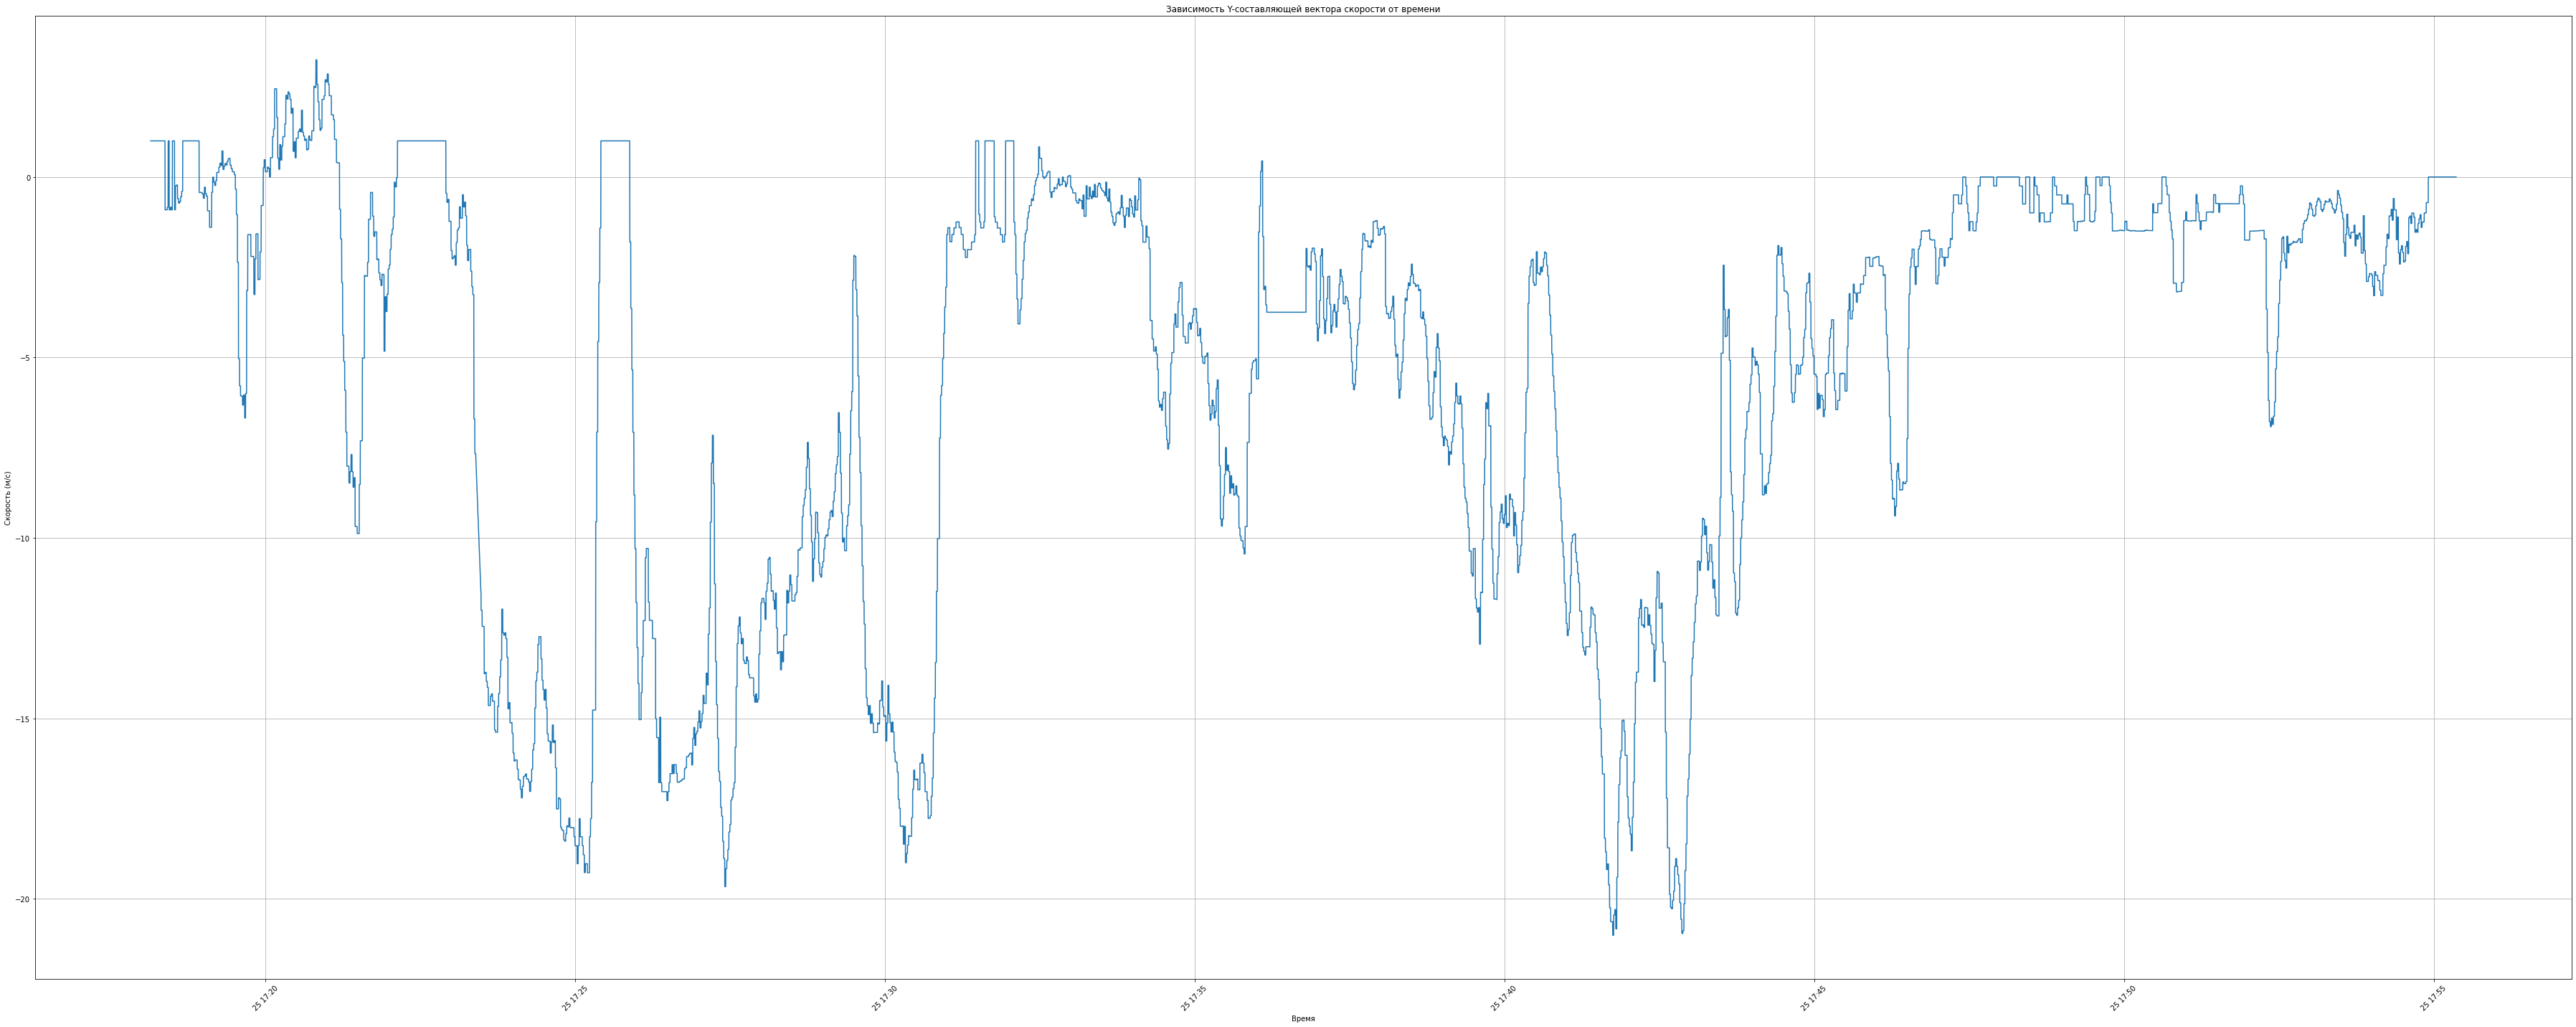

In [5]:
# построение составляющей скорости по y (м/c)
# Устанавливаем размер графика
plt.figure(figsize=(50, 20))

# Строим график
plt.plot(df[' Device Time'], gps_speed_in_m_per_sec_y)
plt.xlabel('Время')
plt.ylabel('Скорость (м/с)')
plt.title('Зависимость Y-составляющей вектора скорости от времени')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X на 45 градусов для лучшей читаемости
plt.grid(True)  # Включаем сетку
plt.tight_layout()  # Автоматическое выравнивание

# Сохраняем график в виде файла формата PDF
plt.savefig("from_GPS_speed_m_per_sec_Y_COMPONENT.pdf")

# Отображаем график
plt.show()
plt.close()

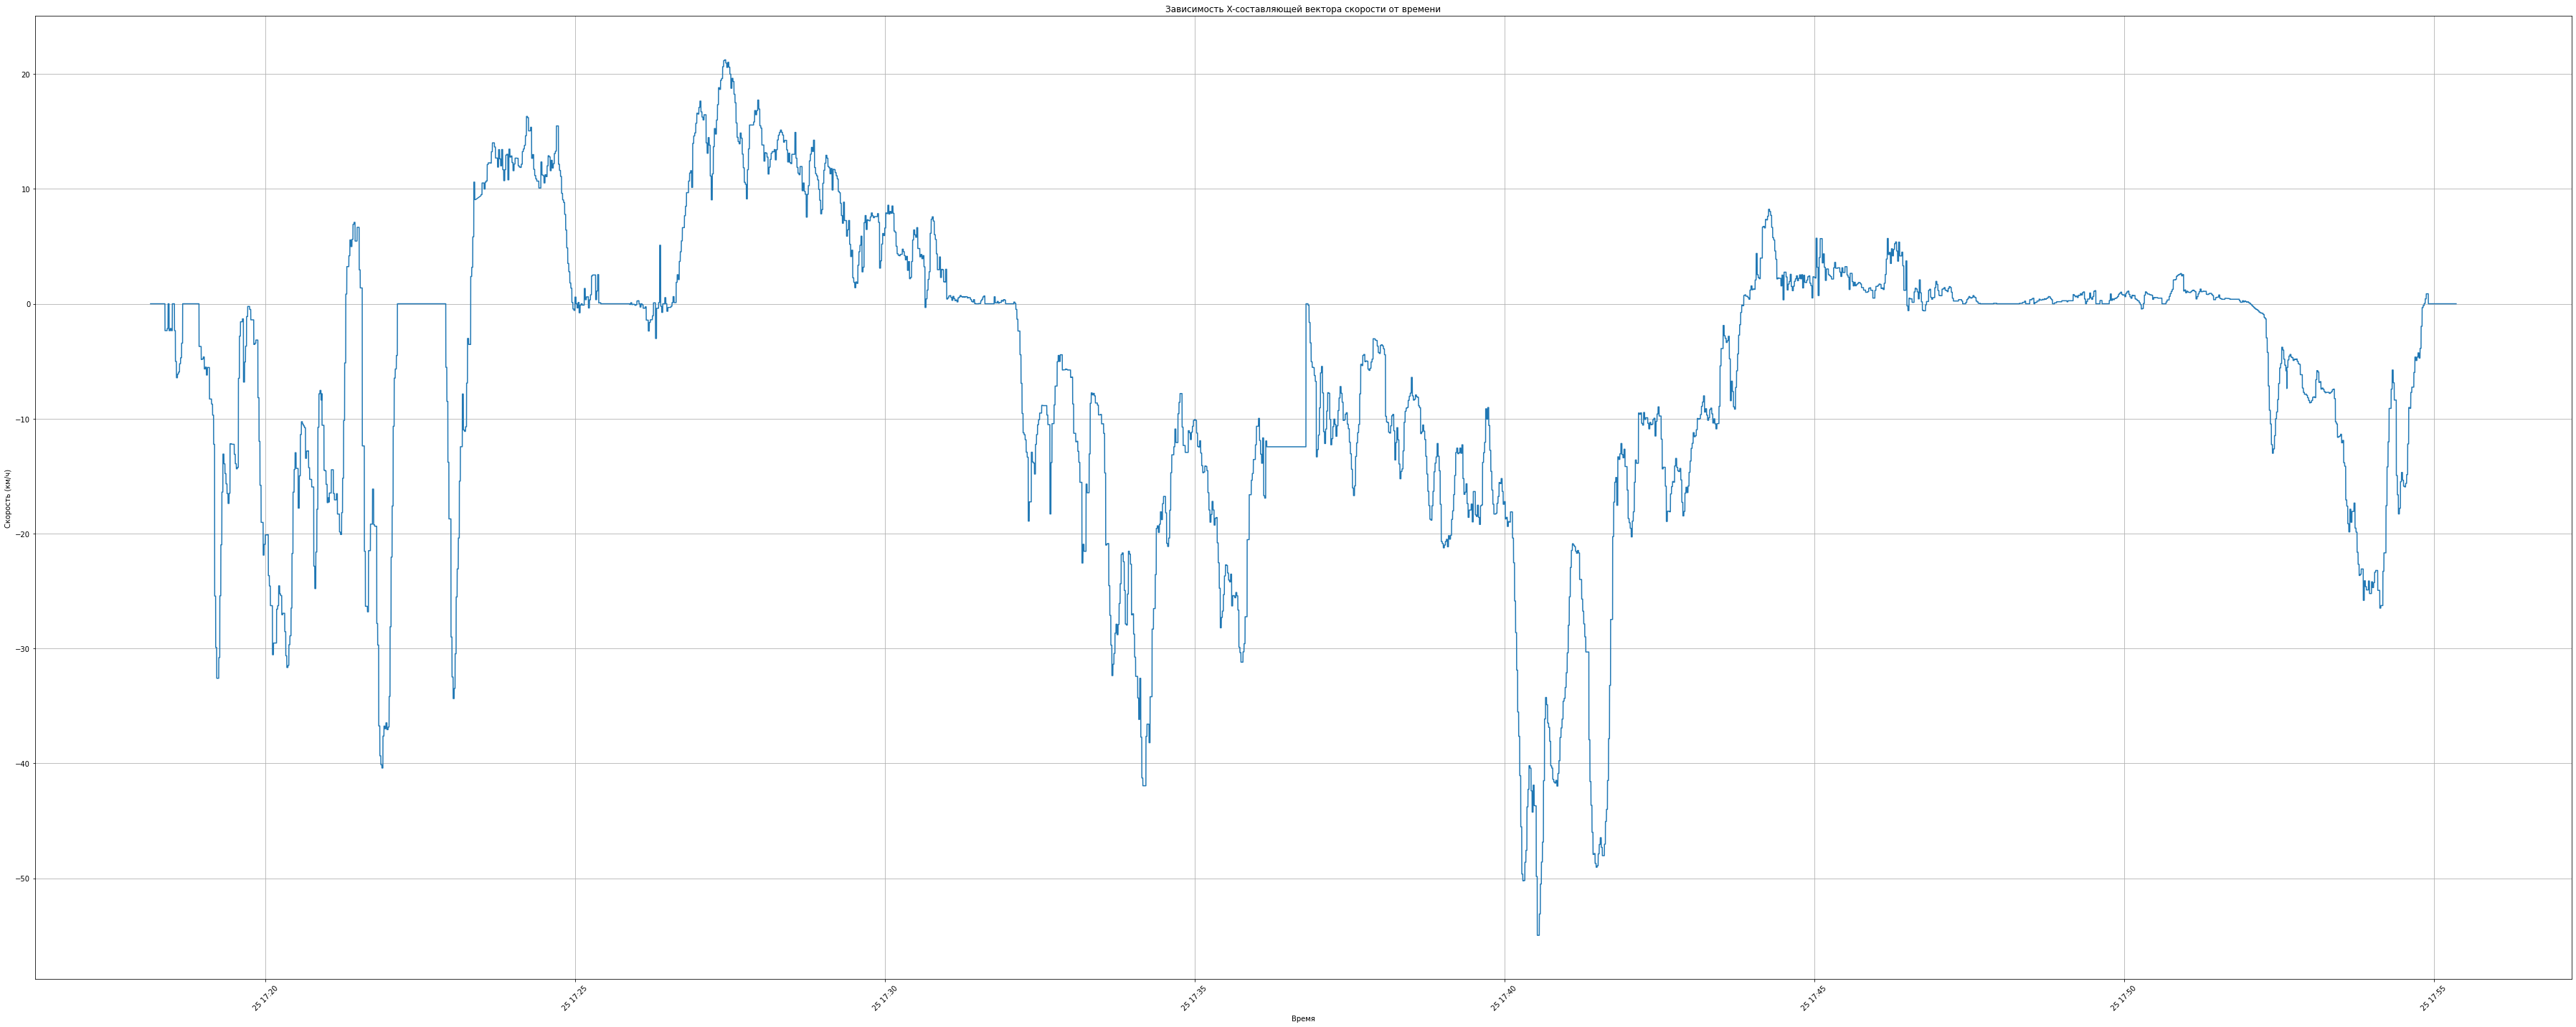

In [6]:
# построение составляющей скорости по x (км/ч)
# Устанавливаем размер графика
plt.figure(figsize=(50, 20))

# Строим график
plt.plot(df[' Device Time'], gps_speed_in_km_per_hrs_x)
plt.xlabel('Время')
plt.ylabel('Скорость (км/ч)')
plt.title('Зависимость X-составляющей вектора скорости от времени')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X на 45 градусов для лучшей читаемости
plt.grid(True)  # Включаем сетку
plt.tight_layout()  # Автоматическое выравнивание

# Сохраняем график в виде файла формата PDF
plt.savefig("from_GPS_speed_km_per_hrs_X_COMPONENT.pdf")

# Отображаем график
plt.show()
plt.close()

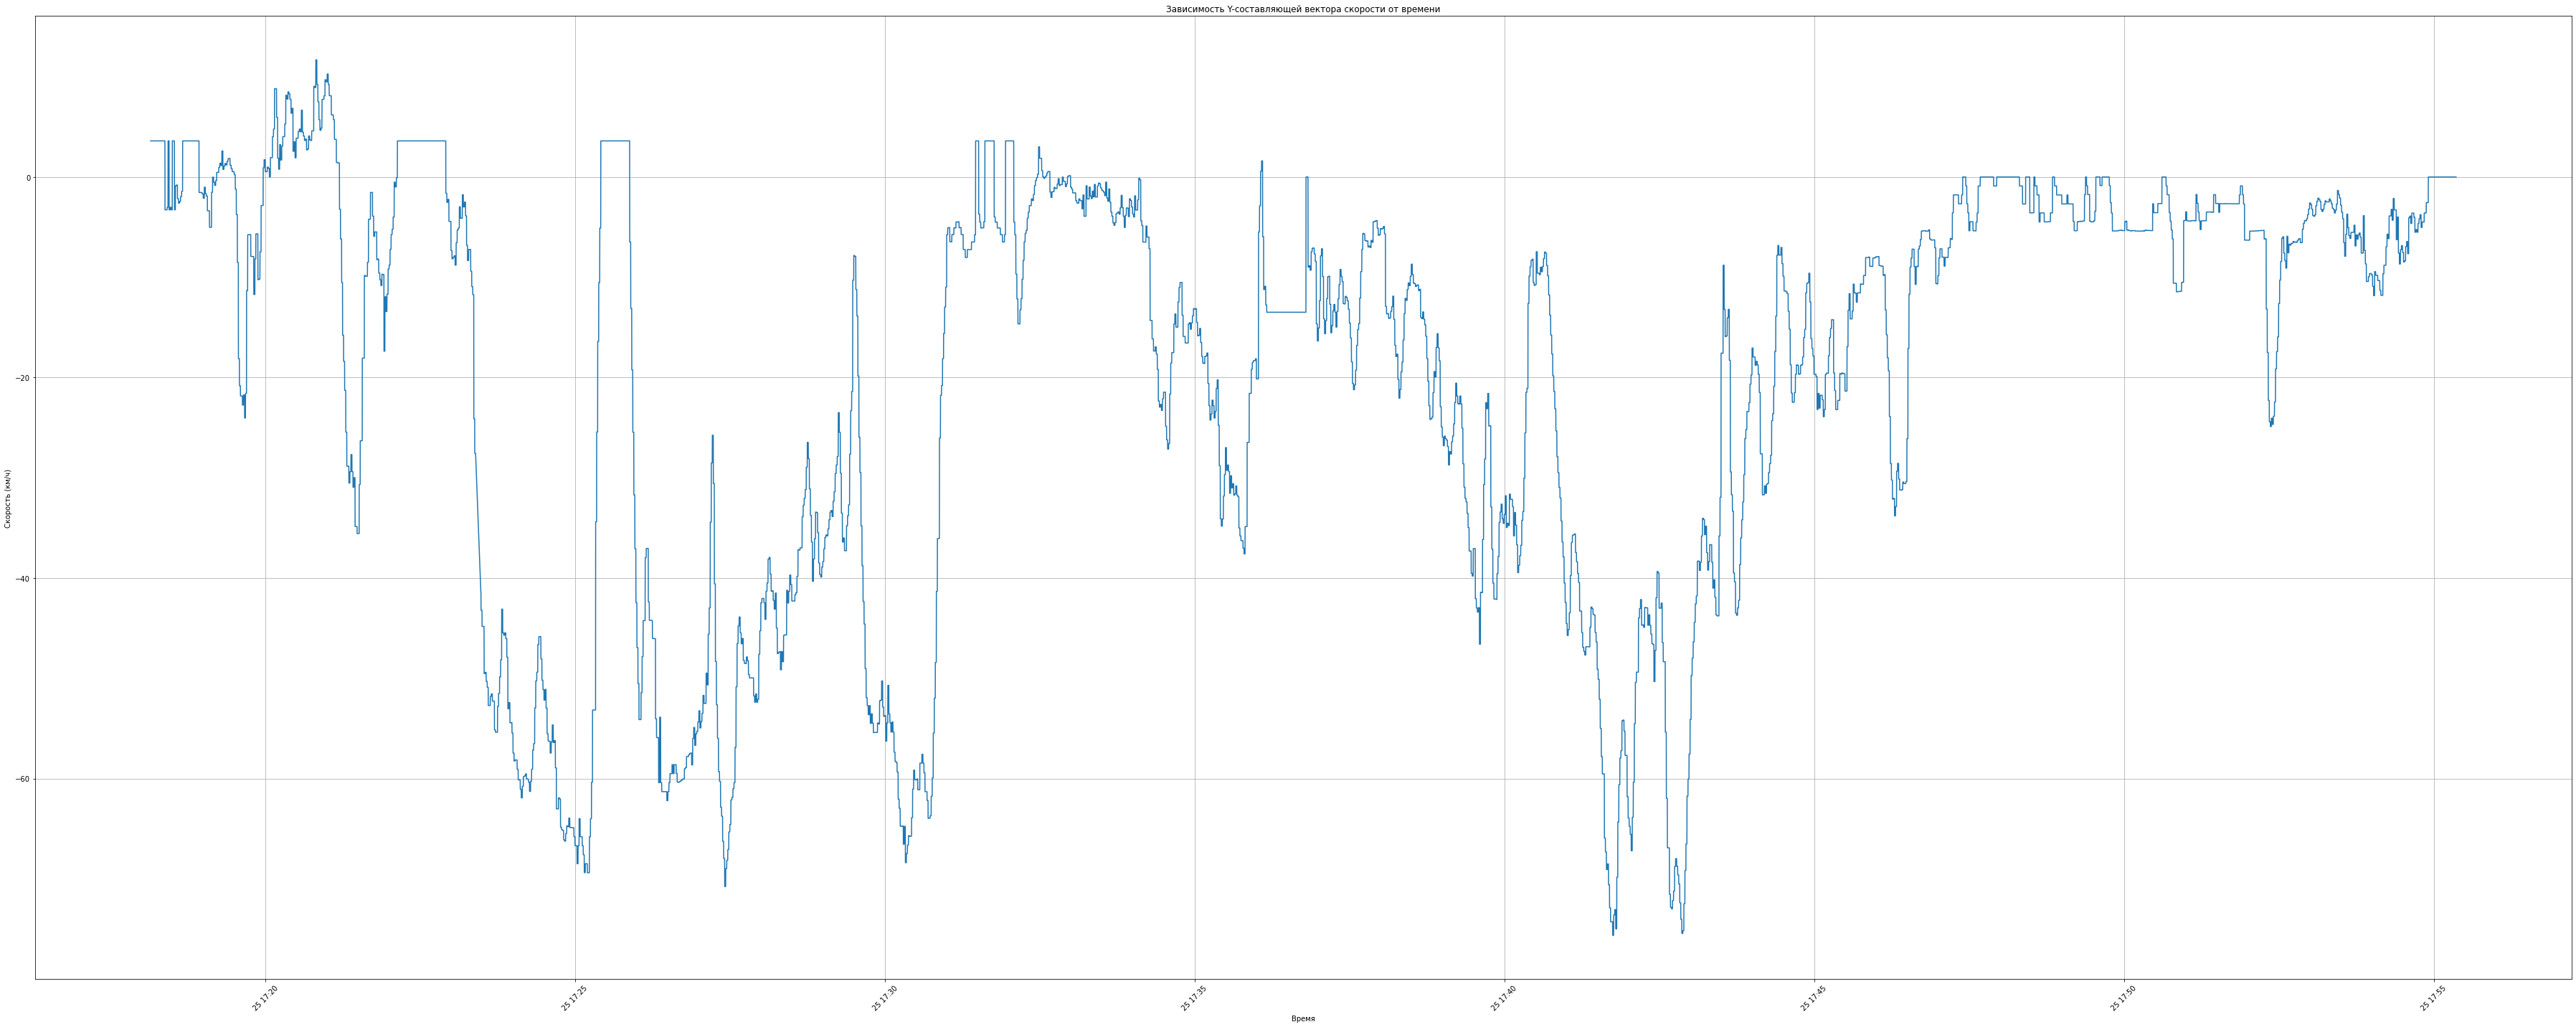

In [7]:
# построение составляющей скорости по y (км/ч)
# Устанавливаем размер графика
plt.figure(figsize=(50, 20))

# Строим график
plt.plot(df[' Device Time'], gps_speed_in_km_per_hrs_y)
plt.xlabel('Время')
plt.ylabel('Скорость (км/ч)')   
plt.title('Зависимость Y-составляющей вектора скорости от времени')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X на 45 градусов для лучшей читаемости
plt.grid(True)  # Включаем сетку
plt.tight_layout()  # Автоматическое выравнивание

# Сохраняем график в виде файла формата PDF
plt.savefig("from_GPS_speed_km_per_hrs_Y_COMPONENT.pdf")

# Отображаем график
plt.show()
plt.close()